<a href="https://colab.research.google.com/github/MichalWilk45/MichalWilk45/blob/main/Pima_Indians_Diabetes_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dodać imputacje danych gdzie wartosć wynosi 0, [najważniejsze dla insulina, skin thickness]
#Dobrać hiperparametry

#ParamGrid?? - check what is that

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
file_path = "/gdrive/My Drive/diabetes.csv"
diabetes = pd.read_csv(file_path)

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
corr = diabetes.corr()

print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

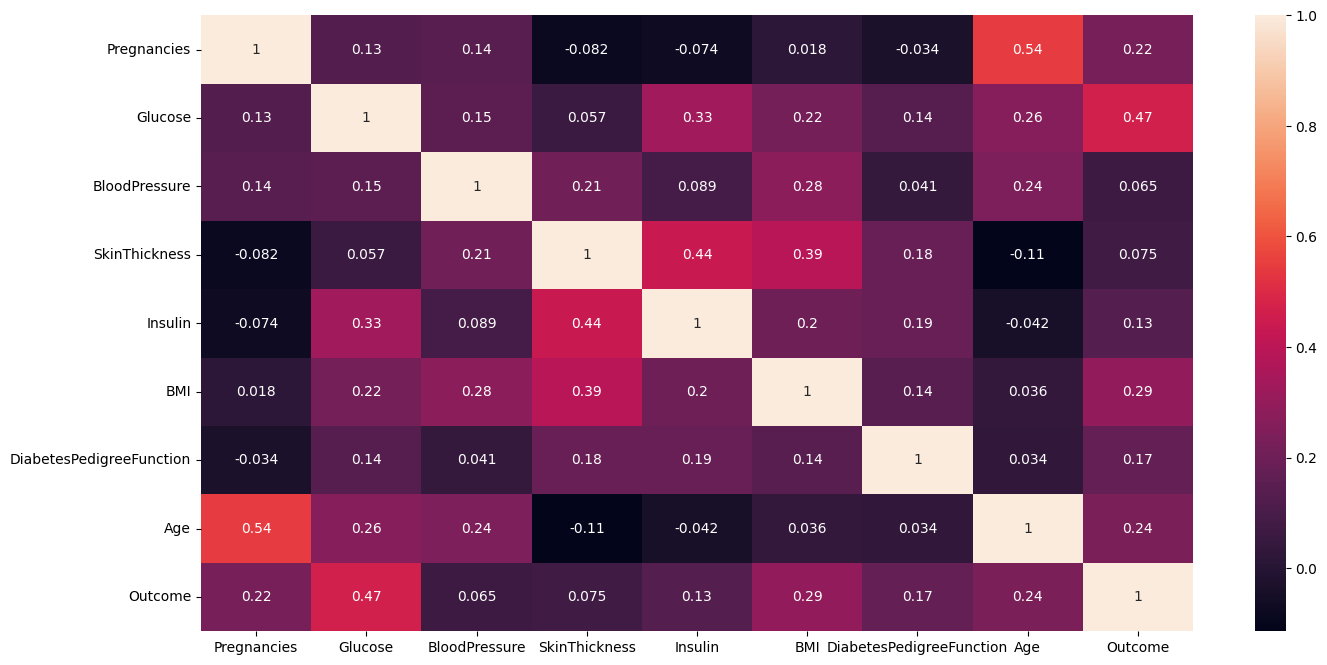

In [8]:
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot = True)


In [9]:
#checking if there are any rows that holds any null value
null_rows = diabetes.isnull().any(axis=1)

null = null_rows[null_rows == True]

print(null)

type(null)

Series([], dtype: bool)


pandas.core.series.Series

In [53]:
diabetes_NaN=diabetes.copy()
diabetes_NaN[['Insulin','SkinThickness','BloodPressure','Glucose','BMI','DiabetesPedigreeFunction']] = diabetes_NaN[['Insulin','SkinThickness','BloodPressure','Glucose','BMI','DiabetesPedigreeFunction']].replace(0, np.nan)
diabetes_NaN[['Insulin','SkinThickness','BloodPressure','Glucose','BMI','DiabetesPedigreeFunction']] = diabetes_NaN[['Insulin','SkinThickness','BloodPressure','Glucose','BMI','DiabetesPedigreeFunction']].replace(np.nan, np.nan)
diabetes_NaN.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [137]:
diabetes_NaN.fillna(diabetes_NaN.mean(), inplace=True)
diabetes_NaN.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128135       0.214178       0.100239   
Glucose                      0.128135  1.000000       0.223192       0.228043   
BloodPressure                0.214178  0.223192       1.000000       0.226839   
SkinThickness                0.100239  0.228043       0.226839       1.000000   
Insulin                      0.082171  0.581186       0.098272       0.184888   
BMI                          0.021719  0.232771       0.289230       0.648214   
DiabetesPedigreeFunction    -0.033523  0.137246      -0.002805       0.115016   
Age                          0.544341  0.267136       0.330107       0.166816   
Outcome                      0.221898  0.494650       0.170589       0.259491   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.082171  0.021719                 -0.033523   
Glucose                   0.581186  0.232

<Axes: >

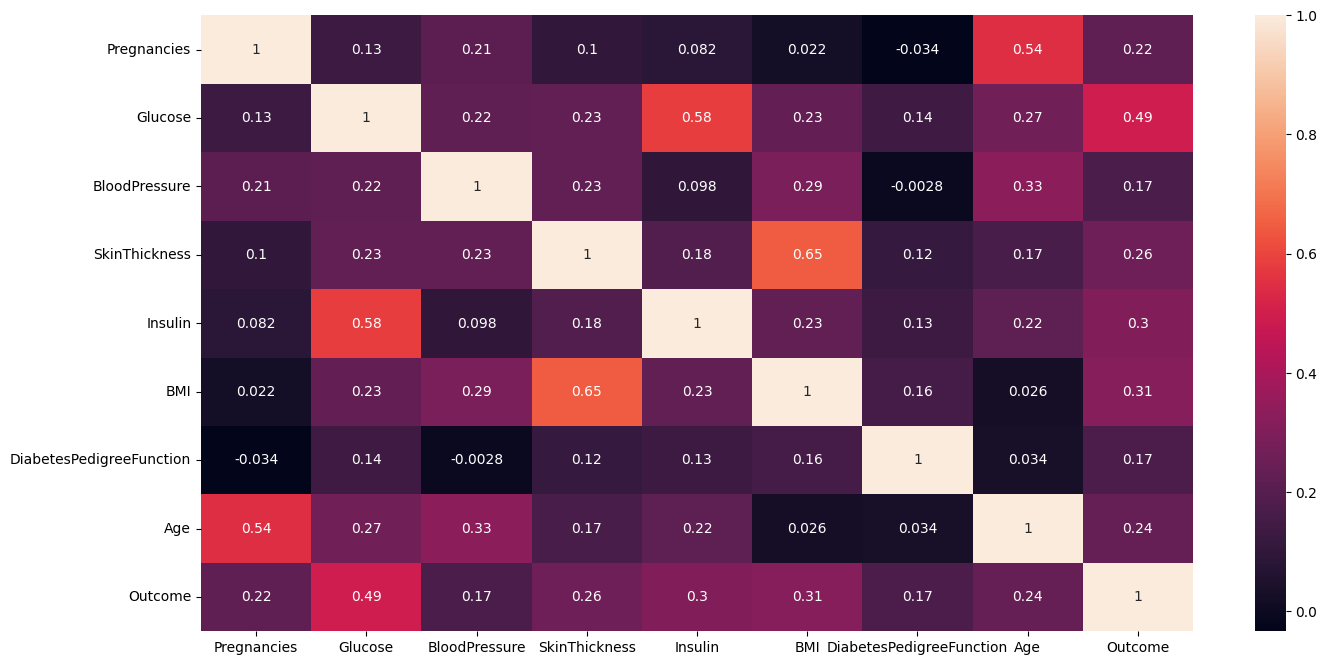

In [40]:
corr_NaN = diabetes_NaN.corr()

print(corr_NaN)

plt.figure(figsize=(16, 8))
sns.heatmap(corr_NaN, annot = True)


In [11]:
# Standaryzacja i normalizacja danych. Średnia wartośc zmiennych wynosi jeden z odchyleniem 1
scaler = StandardScaler()
diabetes_scaled=diabetes.copy()
numeric_columns = diabetes_scaled.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove("Outcome") 
diabetes_scaled[numeric_columns] = scaler.fit_transform(diabetes_scaled[numeric_columns])

In [12]:
diabetes.info()
diabetes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:

diabetes_scaled.info()
diabetes_scaled.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16,0.348958
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.476951
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00,0.000000
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01,0.000000
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01,0.000000
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01,1.000000
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00,1.000000


In [15]:
diabetes_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [16]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
X = diabetes.drop([ 'Outcome'], axis=1)
y = diabetes['Outcome']

X_NaN = diabetes_NaN.drop([ 'Outcome'], axis=1)
y_NaN = diabetes_NaN['Outcome']

X_s = diabetes_scaled.drop([ 'Outcome'], axis=1)
y_s = diabetes_scaled['Outcome']

In [56]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [134]:
test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=test_size, random_state=random_state)
X_NaN_train, X_NaN_test, y_NaN_train, y_NaN_test = train_test_split(X_NaN, y_NaN, test_size=test_size, random_state=random_state)


In [135]:
# 4. Budowanie modelu:
# Wybór algorytmu uczenia maszynowego
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

In [21]:
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean = np.mean(scores)
    print(f"Model: {name} - Cross-validation scores: {scores} \nMean of crossvalidation: {mean} \n")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Model: Logistic Regression - Cross-validation scores: [0.75609756 0.82926829 0.7398374  0.7398374  0.78688525] 
Mean of crossvalidation: 0.7703851792616286 

Model: Random Forest - Cross-validation scores: [0.75609756 0.82113821 0.76422764 0.74796748 0.78688525] 
Mean of crossvalidation: 0.7752632280421164 

Model: SVM - Cross-validation scores: [0.71544715 0.79674797 0.75609756 0.7398374  0.75409836] 
Mean of crossvalidation: 0.7524456883913102 



In [22]:
for name, model in models.items():
    scores = cross_val_score(model, X_s_train, y_s_train, cv=5)
    mean = np.mean(scores)
    print(f"Model: {name} - Cross-validation scores: {scores} \nMean of crossvalidation: {mean} \n")

Model: Logistic Regression - Cross-validation scores: [0.74796748 0.80487805 0.73170732 0.73170732 0.78688525] 
Mean of crossvalidation: 0.7606290817006529 

Model: Random Forest - Cross-validation scores: [0.7804878  0.77235772 0.74796748 0.7398374  0.79508197] 
Mean of crossvalidation: 0.7671464747434359 

Model: SVM - Cross-validation scores: [0.76422764 0.80487805 0.73170732 0.76422764 0.76229508] 
Mean of crossvalidation: 0.7654671464747433 



In [136]:
for name, model in models.items():
    scores_NaN = cross_val_score(model, X_NaN_train, y_NaN_train, cv=5)
    mean_NaN = np.mean(scores_NaN)
    print(f"Model: {name} - Cross-validation scores: {scores_NaN} \nMean of crossvalidation: {mean_NaN} \n")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Model: Logistic Regression - Cross-validation scores: [0.76422764 0.80487805 0.74796748 0.7398374  0.78688525] 
Mean of crossvalidation: 0.7687591630014661 

Model: Random Forest - Cross-validation scores: [0.76422764 0.80487805 0.73170732 0.73170732 0.78688525] 
Mean of crossvalidation: 0.7638811142209783 

Model: SVM - Cross-validation scores: [0.73170732 0.78861789 0.71544715 0.74796748 0.7704918 ] 
Mean of crossvalidation: 0.7508463281354125 



In [131]:
# 5. Ocena modelu:
# Wybór najlepszego modelu
best_model = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2)
best_model.fit(X_NaN_train, y_NaN_train)
y_NaN_pred = best_model.predict(X_NaN_test)

In [132]:
# Ocena jakości modelu na zbiorze testowym
accuracy_NaN = accuracy_score(y_NaN_test, y_NaN_pred)
print(f"Accuracy: {accuracy_NaN}")
print(confusion_matrix(y_NaN_test, y_NaN_pred))
print(classification_report(y_NaN_test, y_NaN_pred))

Accuracy: 0.7727272727272727
[[84 15]
 [20 35]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        99
           1       0.70      0.64      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154



In [96]:
# 5. Ocena modelu:
# Wybór najlepszego modelu
best_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [97]:
# Ocena jakości modelu na zbiorze testowym
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7467532467532467
[[81 18]
 [21 34]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        99
           1       0.65      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154

